# Transcript A from Lecture, March 2, 2023

In [1]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/gilbert/Documents/CS111-2023-winter/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import json
import cs111

#######################################################
# Here are three different ways to have plots appear. #
# Uncomment the one you want to use.                  #
#                                                     #
# inline    : static plot in notebook                 #
# ipympl    : plot in notebook with pan/zoom controls #
# tk        : plot in popup window with pan/zoom      #
#                                                     #
# If %matplotlib ipympl doesn't work, try saying:     #
#   conda install -c conda-forge ipympl               #
# at a shell prompt.                                  #
#######################################################
import matplotlib
%matplotlib inline 
# %matplotlib ipympl
# %matplotlib tk 

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision = 4)

# Laplacian matrices of graphs

Let $G$ be an undirected graph whose $n$ vertices are the integers from 0 to $n-1$. The *Laplacian matrix* of $G$ is the $n$-by-$n$ matrix $L = L(G)$ whose entries are as follows:

- L[i,i] is the degree of vertex i
- L[i,j] = -1 if (i,j) is an edge in G (and then also L[j,i] = -1)
- The other elements of L are zero

In [2]:
# The Laplacian matrix of a 4-vertex cycle

L = np.array([[2, -1, 0, -1], [-1, 2, -1, 0], [0, -1, 2, -1], [-1, 0, -1, 2]])

print('L:'); print(L)

L:
[[ 2 -1  0 -1]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]


In [3]:
print('L:'); print(L)
print()

lam, W = spla.eigh(L)

print('lam:', lam)
print('W:'); print(W)

L:
[[ 2 -1  0 -1]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]

lam: [2.6645e-15 2.0000e+00 2.0000e+00 4.0000e+00]
W:
[[-5.0000e-01  0.0000e+00  7.0711e-01  5.0000e-01]
 [-5.0000e-01 -7.0711e-01 -4.5756e-16 -5.0000e-01]
 [-5.0000e-01  2.8708e-16 -7.0711e-01  5.0000e-01]
 [-5.0000e-01  7.0711e-01 -1.7048e-16 -5.0000e-01]]


In [5]:
np.ones(4)

array([1., 1., 1., 1.])

In [4]:
npla.matrix_rank(L)

3

In [6]:
L @ np.ones(4)

array([0., 0., 0., 0.])

In [7]:
def path(n):
    """Laplacian matrix of the n-vertex path graph"""
    E = np.diag(np.ones(n-1), -1)
    L = 2*np.eye(n) - E - E.T
    L[0,0] = 1
    L[-1,-1] = 1
    return L

In [8]:
L = path(5)
print('L:'); print(L)

L:
[[ 1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  1.]]


In [9]:
L @ np.ones(5)

array([0., 0., 0., 0., 0.])

In [10]:
lam, W = spla.eigh(L)
print('lam:', lam)
print('W:')
print(W)

lam: [0.    0.382 1.382 2.618 3.618]
W:
[[ 4.4721e-01  6.0150e-01 -5.1167e-01  3.7175e-01 -1.9544e-01]
 [ 4.4721e-01  3.7175e-01  1.9544e-01 -6.0150e-01  5.1167e-01]
 [ 4.4721e-01  5.3654e-16  6.3246e-01  1.4024e-15 -6.3246e-01]
 [ 4.4721e-01 -3.7175e-01  1.9544e-01  6.0150e-01  5.1167e-01]
 [ 4.4721e-01 -6.0150e-01 -5.1167e-01 -3.7175e-01 -1.9544e-01]]


In [11]:
L = path(20)
print('L:'); print(L)

L:
[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0. 

In [12]:
lam, W = spla.eigh(L)
print('lam:', lam)
print('W:')
print(W)

lam: [0.     0.0246 0.0979 0.218  0.382  0.5858 0.8244 1.092  1.382  1.6871
 2.     2.3129 2.618  2.908  3.1756 3.4142 3.618  3.782  3.9021 3.9754]
W:
[[ 2.2361e-01  3.1525e-01  3.1233e-01 -3.0749e-01  3.0075e-01 -2.9216e-01
  -2.8176e-01  2.6963e-01 -2.5583e-01  2.4046e-01 -2.2361e-01 -2.0537e-01
   1.8587e-01  1.6523e-01  1.4356e-01  1.2102e-01  9.7720e-02 -7.3822e-02
   4.9469e-02 -2.4811e-02]
 [ 2.2361e-01  3.0749e-01  2.8176e-01 -2.4046e-01  1.8587e-01 -1.2102e-01
  -4.9469e-02 -2.4811e-02  9.7720e-02 -1.6523e-01  2.2361e-01  2.6963e-01
  -3.0075e-01 -3.1525e-01 -3.1233e-01 -2.9216e-01 -2.5583e-01  2.0537e-01
  -1.4356e-01  7.3822e-02]
 [ 2.2361e-01  2.9216e-01  2.2361e-01 -1.2102e-01 -4.3336e-16  1.2102e-01
   2.2361e-01 -2.9216e-01  3.1623e-01 -2.9216e-01  2.2361e-01  1.2102e-01
  -1.6361e-15  1.2102e-01  2.2361e-01  2.9216e-01  3.1623e-01 -2.9216e-01
   2.2361e-01 -1.2102e-01]
 [ 2.2361e-01  2.6963e-01  1.4356e-01  2.4811e-02 -1.8587e-01  2.9216e-01
   3.1233e-01 -2.4046e-01  9

Text(0.5, 0, 'eigenvector 0 of path graph')

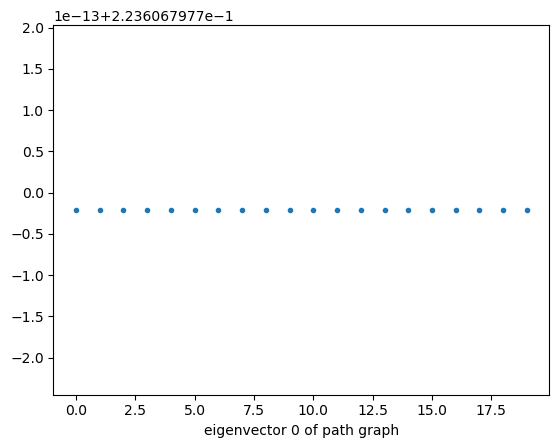

In [13]:
i = 0
plt.figure()
plt.plot(W[:,i], '.')
plt.xlabel(f'eigenvector {i} of path graph')

Text(0.5, 0, 'eigenvector 1 of path graph')

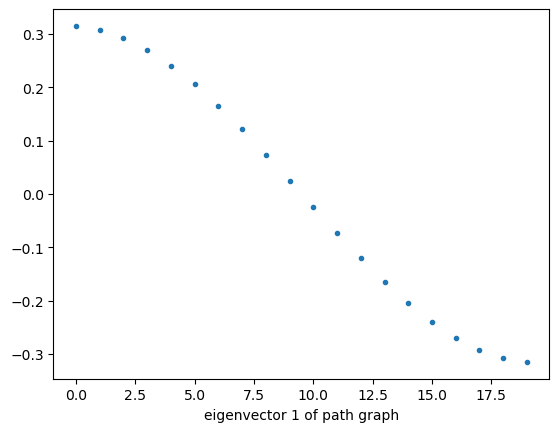

In [14]:
i = 1
plt.figure()
plt.plot(W[:,i], '.')
plt.xlabel(f'eigenvector {i} of path graph')

Text(0.5, 0, 'eigenvector 2 of path graph')

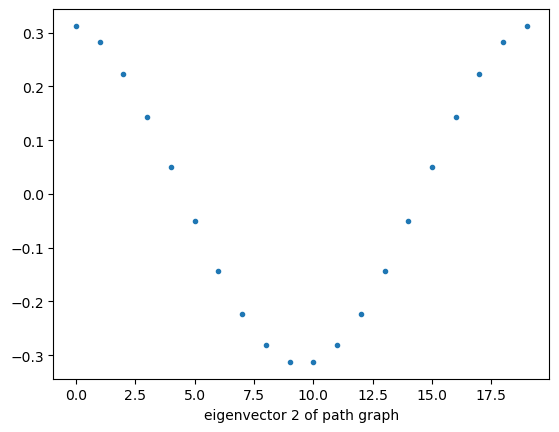

In [15]:
i = 2
plt.figure()
plt.plot(W[:,i], '.')
plt.xlabel(f'eigenvector {i} of path graph')

Text(0.5, 1.0, 'Eigenvectors of the Laplacian of a path')

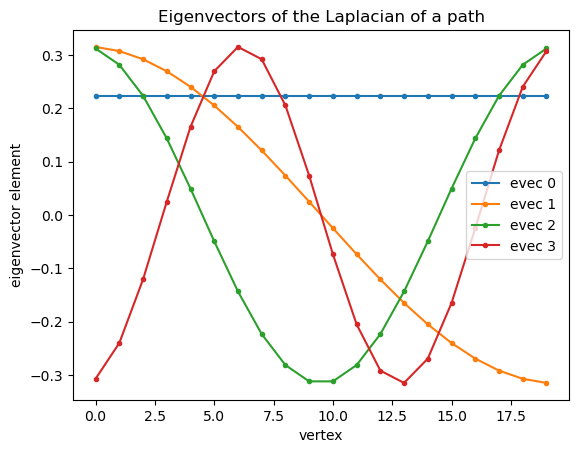

In [16]:
plt.figure()

for i in range(4):
    plt.plot(W[:,i], ".-", label = f'evec {i}')

plt.legend()
plt.xlabel('vertex')
plt.ylabel('eigenvector element')
plt.title('Eigenvectors of the Laplacian of a path')

Text(0.5, 1.0, 'Eigenvectors of the Laplacian of a path')

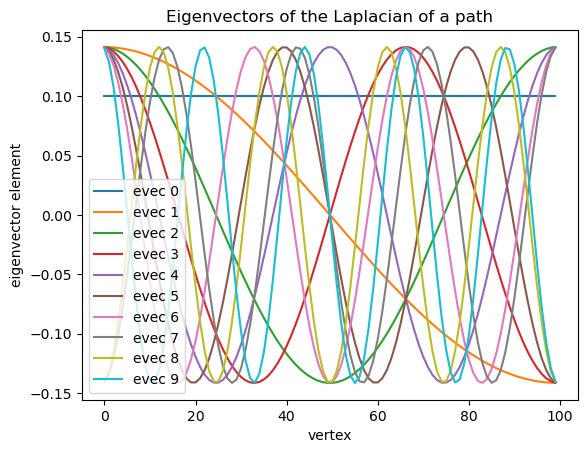

In [17]:
L = path(100)
lam, W = spla.eigh(L)
plt.figure()

for i in range(10):
    plt.plot(W[:,i], label = f'evec {i}')

plt.legend()
plt.xlabel('vertex')
plt.ylabel('eigenvector element')
plt.title('Eigenvectors of the Laplacian of a path')

# A graph's Laplacian is the sum of the Laplacians of its edges

In [18]:
# Example: the 4-cycle

n = 4
L = np.zeros((n,n))
for (i,j) in [(0,1), (1,2), (2,3), (3,0)]:
    e = np.zeros(n)
    e[i] = 1
    e[j] = -1
    print(f"\nLaplacian of edge ({i},{j}):\n", np.outer(e,e))
    L += np.outer(e,e)


Laplacian of edge (0,1):
 [[ 1. -1.  0.  0.]
 [-1.  1. -0. -0.]
 [ 0. -0.  0.  0.]
 [ 0. -0.  0.  0.]]

Laplacian of edge (1,2):
 [[ 0.  0. -0.  0.]
 [ 0.  1. -1.  0.]
 [-0. -1.  1. -0.]
 [ 0.  0. -0.  0.]]

Laplacian of edge (2,3):
 [[ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  1. -1.]
 [-0. -0. -1.  1.]]

Laplacian of edge (3,0):
 [[ 1. -0. -0. -1.]
 [-0.  0.  0.  0.]
 [-0.  0.  0.  0.]
 [-1.  0.  0.  1.]]


In [19]:
print("Laplacian of cycle graph:\n", L)

Laplacian of cycle graph:
 [[ 2. -1.  0. -1.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [-1.  0. -1.  2.]]


# The Laplacian quadratic form

In [20]:
n = L.shape[0]

x = np.random.randn(n)
print('vector x:', x)
print()
print('x.T @ L @ x:', np.dot(x, L @ x))

vector x: [-0.2434 -1.071  -1.6647 -0.5109]

x.T @ L @ x: 2.440004457970085


In [21]:
s = 0
for i in range(n):
    for j in range(i):
        if L[i,j] == -1:
            # (i,j) is an edge in the graph
            s += (x[i]-x[j])**2
            
print('sum of squared edge diffs:', s)

sum of squared edge diffs: 2.440004457970085


In [ ]:
n = L.shape[0]

x = np.ones(n)
print('vector x:', x)
print()
print('x.T @ L @ x:', np.dot(x, L @ x))